In [24]:
import pandas as pd
import numpy as np
from unidecode import unidecode
import os
import glob

In [25]:
df, muta = [pd.read_csv(file_) for file_ in glob.glob(os.path.join('../data/', '*'))]

### Missing Values

In [26]:
df.isna().mean() * 100

GISAID ID                     0.060680
Unnamed: 1                  100.000000
Virus name                    0.060680
FECHA DE COLECCIÓN            0.060680
FECHA DE SUBIDA A GISAID      0.060680
PROVINCIA                     0.060680
CIUDAD                        0.242718
TIPO                          0.910194
Genero                        0.060680
Edad                          0.060680
Linaje                        0.060680
Clado                         0.060680
Mutaciones                    0.060680
dtype: float64

In [27]:
muta.isna().mean() * 100

0I (Alpha, V1) (B.1.1.7)        78.181818
20H (Beta, V2) (B.1.351)        80.000000
20J (Gamma, V3) (P.1)           78.181818
21A (Delta) (B.1.617.2)         83.636364
21B (Kappa) (B.1.617.1)         89.090909
21K (Omicron) (BA.1)            34.545455
21L (Omicron) (BA.2)            43.636364
22A & 22B (Omicron) (BA.4&5)    38.181818
22C (Omicron) (BA.2.12.1)       40.000000
21D (Eta) (B.1.525)             83.636364
21F (Iota) (B.1.526)            89.090909
21G (Lambda) (C.37)             74.545455
21H (Mu) (B.1.621)              83.636364
dtype: float64

### Memory Usage

In [28]:
(df
 .memory_usage(deep=True)
 .pipe(lambda df_:pd.concat([df_, df.dtypes], axis=1))
 .rename(columns={0:'memory', 1:'dtype'})
)

,memory,dtype
Index,128,NaN
GISAID ID,119098,object
Unnamed: 1,13184,float64
Virus name,143752,object
FECHA DE COLECCIÓN,110114,object
FECHA DE SUBIDA A GISAID,110381,object
PROVINCIA,110907,object
CIUDAD,106642,object
TIPO,109197,object
Genero,102496,object


### The Data

In [29]:
df.sample(10).T

,832,713,1073,1243,762,1609,220,1439,169,155
GISAID ID,EPI_ISL_7709482,EPI_ISL_4511380,EPI_ISL_10801137,EPI_ISL_11048368,EPI_ISL_6367739,EPI_ISL_13102234,EPI_ISL_2004107,EPI_ISL_11515623,EPI_ISL_1805657,EPI_ISL_1366737
Unnamed: 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Virus name,hCoV-19/Ecuador/USFQ-2287/2021,hCoV-19/Ecuador/USFQ-2092/2021,hCoV-19/Ecuador/USFQ-2708/2022,hCoV-19/Ecuador/USFQ-2962/2022,hCoV-19/Ecuador/USFQ-2212/2021,hCoV-19/Ecuador/USFQ-3395/2022,hCoV-19/Ecuador/USFQ-1205-UTPL060/2021,hCoV-19/Ecuador/USFQ-3205/2022,hCoV-19/Ecuador/USFQ-1029-UTPL003/2021,hCoV-19/Ecuador/USFQ-985/2021
FECHA DE COLECCIÓN,2021-11-17,2021-08-31,2022-01-21,2022-02-10,2021-10-20,2022-04-27,2021-04-21,2022-01-05,2021-04-06,2021
FECHA DE SUBIDA A GISAID,2021-12-16,2021-09-25,2022-03-08,2022-03-15,2021-11-17,2022-06-03,2021-05-11,2022-03-28,2021-04-30,2021-03-26
PROVINCIA,Tungurahua,Pichincha,Pichincha,Pichincha,Tungurahua,Pichincha,Loja,Pichincha,Loja,Pichincha
CIUDAD,AMBATO,QUITO,QUITO,QUITO,AMBATO,Quito,Loja,QUITO,Loja,QUITO
TIPO,Hospital,Ambulatorio,Hospital,Ambulatorio,Hospital,Ambulatorio,Ambulatorio,Ambulatorio,Hospital,Hospital
Genero,Female,Male,Female,Male,Male,Female,Male,Female,Male,Female
Edad,unknown,unknown,unknown,unknown,unknown,27,42,unknown,60,unknown


In [30]:
muta.head().T

,0,1,2,3,4
"0I (Alpha, V1) (B.1.1.7)",Principales mutaciones,S:D614G,NaN,S:P681H,S:N501Y
"20H (Beta, V2) (B.1.351)",NaN,S:D614G,S:E484K,NaN,S:N501Y
"20J (Gamma, V3) (P.1)",NaN,S:D614G,S:E484K,NaN,S:N501Y
21A (Delta) (B.1.617.2),NaN,S:D614G,NaN,S:P681R,NaN
21B (Kappa) (B.1.617.1),NaN,S:D614G,S:E484Q,S:P681R,NaN
21K (Omicron) (BA.1),NaN,S:D614G,S:E484A,S:P681H,S:N501Y
21L (Omicron) (BA.2),NaN,S:D614G,S:E484A,S:P681H,S:N501Y
22A & 22B (Omicron) (BA.4&5),NaN,S:D614G,S:E484A,S:P681H,S:N501Y
22C (Omicron) (BA.2.12.1),NaN,S:D614G,S:E484A,S:P681H,S:N501Y
21D (Eta) (B.1.525),NaN,S:D614G,S:E484K,NaN,NaN


### Columns and Index

In [4]:
(df
 .rename(columns=lambda c:unidecode(c.replace(' ', '_').lower()))
 .drop(columns=['gisaid_id', 'unnamed:_1', 'fecha_de_subida_a_gisaid'])
)

,virus_name,fecha_de_coleccion,provincia,ciudad,tipo,genero,edad,linaje,clado,mutaciones
0,hCoV-19/Ecuador/HEE-01/2020,2020-03-09,Pichincha,QUITO,Hospital,Male,57,B.55,L,Spike E1207V
1,hCoV-19/Ecuador/HGSQ-USFQ-018/2020,2020-03-30,Pichincha,QUITO,Hospital,Male,27,B.1.1,GR,"(N_R203K,N_G204R,NSP12_P323L,NSP3_L431F,Spike_..."
2,hCoV-19/Ecuador/HGSQ-USFQ-007/2020,2020-03-30,Pichincha,QUITO,Hospital,Male,40,B.1.14,O,"(NSP15_S293T,NS3_Q38P,NS3_V163T,NS3_R122E,NS3_..."
3,hCoV-19/Ecuador/HGSQ-USFQ-010/2020,2020-03-30,Pichincha,QUITO,Hospital,Male,39,B.1.14,O,"(NSP15_S293T,NS3_Q38P,NS3_V163T,NS3_R122E,NS3_..."
4,hCoV-19/Ecuador/USFQ-020/2020,2020-04-17,Los Rios,BABAHOYO,Hospital,Female,50,B.1.67,G,"(NSP12_P323L,Spike_D614G)"
...,...,...,...,...,...,...,...,...,...,...
1643,hCoV-19/Ecuador/USFQ-3477/2022,2022-05-27,Pichincha,Quito,Ambulatorio,Male,42,BA.2,GRA,"(NSP5_P132H,NSP3_G489S,NSP4_T327I,Spike_S373P,..."
1644,hCoV-19/Ecuador/USFQ-3479/2022,2022-05-28,Pichincha,Quito,Ambulatorio,Male,54,BA.2,GRA,"(NSP5_P132H,NSP3_G489S,Spike_L24del,NSP4_T327I..."
1645,hCoV-19/Ecuador/USFQ-3482/2022,2022-05-29,Pichincha,Quito,Ambulatorio,Male,5,BA.2,GRA,"(NSP5_P132H,NSP3_G489S,NSP4_T327I,Spike_S373P,..."
1646,hCoV-19/Ecuador/USFQ-3483/2022,2022-05-25,Pichincha,Quito,Ambulatorio,Male,34,BA.2,GRA,"(NSP5_P132H,Spike_S371F,NSP3_G489S,NSP13_R392C..."


### Datetimes

In [5]:
(df
 .rename(columns=lambda c:unidecode(c.replace(' ', '_').lower()))
 .drop(columns=['gisaid_id', 'unnamed:_1', 'fecha_de_subida_a_gisaid'])
 .assign(fecha_de_coleccion=lambda df_:pd.to_datetime(df_.fecha_de_coleccion))
 .set_index('fecha_de_coleccion')
)

,virus_name,provincia,ciudad,tipo,genero,edad,linaje,clado,mutaciones
fecha_de_coleccion,,,,,,,,,
2020-03-09,hCoV-19/Ecuador/HEE-01/2020,Pichincha,QUITO,Hospital,Male,57,B.55,L,Spike E1207V
2020-03-30,hCoV-19/Ecuador/HGSQ-USFQ-018/2020,Pichincha,QUITO,Hospital,Male,27,B.1.1,GR,"(N_R203K,N_G204R,NSP12_P323L,NSP3_L431F,Spike_..."
2020-03-30,hCoV-19/Ecuador/HGSQ-USFQ-007/2020,Pichincha,QUITO,Hospital,Male,40,B.1.14,O,"(NSP15_S293T,NS3_Q38P,NS3_V163T,NS3_R122E,NS3_..."
2020-03-30,hCoV-19/Ecuador/HGSQ-USFQ-010/2020,Pichincha,QUITO,Hospital,Male,39,B.1.14,O,"(NSP15_S293T,NS3_Q38P,NS3_V163T,NS3_R122E,NS3_..."
2020-04-17,hCoV-19/Ecuador/USFQ-020/2020,Los Rios,BABAHOYO,Hospital,Female,50,B.1.67,G,"(NSP12_P323L,Spike_D614G)"
...,...,...,...,...,...,...,...,...,...
2022-05-27,hCoV-19/Ecuador/USFQ-3477/2022,Pichincha,Quito,Ambulatorio,Male,42,BA.2,GRA,"(NSP5_P132H,NSP3_G489S,NSP4_T327I,Spike_S373P,..."
2022-05-28,hCoV-19/Ecuador/USFQ-3479/2022,Pichincha,Quito,Ambulatorio,Male,54,BA.2,GRA,"(NSP5_P132H,NSP3_G489S,Spike_L24del,NSP4_T327I..."
2022-05-29,hCoV-19/Ecuador/USFQ-3482/2022,Pichincha,Quito,Ambulatorio,Male,5,BA.2,GRA,"(NSP5_P132H,NSP3_G489S,NSP4_T327I,Spike_S373P,..."


### Numerical Types

In [5]:
(df
 .rename(columns=lambda c:unidecode(c.replace(' ', '_').lower()))
 .drop(columns=['gisaid_id', 'unnamed:_1', 'fecha_de_subida_a_gisaid'])
 .drop(index=df[df.Edad.str.contains('months')==True].index)
 .assign(fecha_de_coleccion=lambda df_:pd.to_datetime(df_.fecha_de_coleccion),
         edad=lambda df_:(df_
                          .edad
                          .replace(to_replace=['unknown', 'M'], value=np.nan)), # neither floats nor int are nullable
        )
 .set_index('fecha_de_coleccion')
)

,virus_name,provincia,ciudad,tipo,genero,edad,linaje,clado,mutaciones
fecha_de_coleccion,,,,,,,,,
2020-03-09,hCoV-19/Ecuador/HEE-01/2020,Pichincha,QUITO,Hospital,Male,57,B.55,L,Spike E1207V
2020-03-30,hCoV-19/Ecuador/HGSQ-USFQ-018/2020,Pichincha,QUITO,Hospital,Male,27,B.1.1,GR,"(N_R203K,N_G204R,NSP12_P323L,NSP3_L431F,Spike_..."
2020-03-30,hCoV-19/Ecuador/HGSQ-USFQ-007/2020,Pichincha,QUITO,Hospital,Male,40,B.1.14,O,"(NSP15_S293T,NS3_Q38P,NS3_V163T,NS3_R122E,NS3_..."
2020-03-30,hCoV-19/Ecuador/HGSQ-USFQ-010/2020,Pichincha,QUITO,Hospital,Male,39,B.1.14,O,"(NSP15_S293T,NS3_Q38P,NS3_V163T,NS3_R122E,NS3_..."
2020-04-17,hCoV-19/Ecuador/USFQ-020/2020,Los Rios,BABAHOYO,Hospital,Female,50,B.1.67,G,"(NSP12_P323L,Spike_D614G)"
...,...,...,...,...,...,...,...,...,...
2022-05-27,hCoV-19/Ecuador/USFQ-3477/2022,Pichincha,Quito,Ambulatorio,Male,42,BA.2,GRA,"(NSP5_P132H,NSP3_G489S,NSP4_T327I,Spike_S373P,..."
2022-05-28,hCoV-19/Ecuador/USFQ-3479/2022,Pichincha,Quito,Ambulatorio,Male,54,BA.2,GRA,"(NSP5_P132H,NSP3_G489S,Spike_L24del,NSP4_T327I..."
2022-05-29,hCoV-19/Ecuador/USFQ-3482/2022,Pichincha,Quito,Ambulatorio,Male,5,BA.2,GRA,"(NSP5_P132H,NSP3_G489S,NSP4_T327I,Spike_S373P,..."


### Non-Numeric Types

#### Conceptos Importantes
##### Linaje
En microbiología, el término linaje se refiere a una rama evolutiva de una especie o un grupo de organismos que comparten una ascendencia común. Se puede pensar en un linaje como un árbol genealógico de una especie, donde las ramas representan diferentes cepas o subespecies que evolucionan a lo largo del tiempo. Los linajes pueden ser identificados por diferentes características, como la secuencia del ADN o la presencia o ausencia de ciertos genes o marcadores bioquímicos. La identificación y seguimiento de los linajes de los microorganismos son importantes en la investigación de enfermedades infecciosas y en la evaluación de la eficacia de los tratamientos y vacunas.

En resumen, un linaje es una rama evolutiva de una especie o grupo de organismos que comparten una ascendencia común.

##### Clado
En microbiología, un clado es un grupo de organismos que incluyen un ancestro común y todos sus descendientes. Se utiliza para clasificar a los organismos según su relación evolutiva y se representa en un árbol filogenético. Los miembros de un clado tienen características similares y comparten una serie de características derivadas que los distinguen de otros grupos.

En un árbol filogenético, los clados se representan por un nodo, que es el punto donde se bifurca el árbol y se separan los linajes evolutivos. Los clados se forman cuando un grupo de organismos diverge de un ancestro común y desarrollan nuevas características a lo largo del tiempo.

El uso de los clados es importante en la clasificación y nomenclatura de los microorganismos, ya que proporciona una forma sistemática de agrupar y describir a los organismos basados en su historia evolutiva.

En resumen, un clado es un grupo de organismos que incluyen un ancestro común y todos sus descendientes y se utiliza para clasificar a los organismos según su relación evolutiva.

##### Mutaciones
En microbiología, una mutación es un cambio en la secuencia del ADN que puede ocurrir naturalmente o ser provocado por agentes mutagénicos como la radiación o productos químicos. Las mutaciones pueden ser puntuales o afectar estructuras más complejas, y pueden ser beneficiosas, perjudiciales o neutras para el organismo. Su impacto depende del tipo de cambio que se produce en la secuencia del ADN y de la función de los genes afectados. Las mutaciones son importantes en la evolución de los microorganismos y pueden ser relevantes en la investigación y diagnóstico de enfermedades infecciosas, ya que pueden conferir resistencia a los antimicrobianos o alterar la virulencia del microorganismo.

En resumen, una mutación es un cambio en la secuencia del ADN que puede ser natural o provocado, puede ser beneficioso, perjudicial o neutro para el organismo, y puede ocurrir en diferentes etapas del ciclo de vida del microorganismo. Las mutaciones son importantes en la evolución y en el diagnóstico de enfermedades infecciosas.

In [31]:
df=(df
 .rename(columns=lambda c:unidecode(c.replace(' ', '_').lower()))
 .drop(columns=['gisaid_id', 'unnamed:_1', 'fecha_de_subida_a_gisaid'])
 .drop(index=df[df.Edad.str.contains('months')==True].index)
 .applymap(lambda tx: unidecode(tx.title()) if isinstance(tx, str) else tx)
 .assign(fecha_de_coleccion=lambda df_:pd.to_datetime(df_.fecha_de_coleccion),
         edad=lambda df_:(df_
                          .edad
                          .replace(to_replace=['Unknown', 'M'], value=np.nan)), # neither floats nor int are nullable
         virus_name_unidentified=lambda df_:(df_.virus_name.str.split('/', expand=True)[2])
        )
 .drop(columns=['virus_name'])
 .set_index('fecha_de_coleccion')
)

In [47]:
df.mutaciones.str.replace(pat='[()]', repl='', regex=True)

fecha_de_coleccion
2020-03-09                                         Spike E1207V
2020-03-30    N_R203K,N_G204R,Nsp12_P323L,Nsp3_L431F,Spike_D...
2020-03-30    Nsp15_S293T,Ns3_Q38P,Ns3_V163T,Ns3_R122E,Ns3_L...
2020-03-30    Nsp15_S293T,Ns3_Q38P,Ns3_V163T,Ns3_R122E,Ns3_L...
2020-04-17                              Nsp12_P323L,Spike_D614G
                                    ...                        
2022-05-27    Nsp5_P132H,Nsp3_G489S,Nsp4_T327I,Spike_S373P,S...
2022-05-28    Nsp5_P132H,Nsp3_G489S,Spike_L24Del,Nsp4_T327I,...
2022-05-29    Nsp5_P132H,Nsp3_G489S,Nsp4_T327I,Spike_S373P,S...
2022-05-25    Nsp5_P132H,Spike_S371F,Nsp3_G489S,Nsp13_R392C,...
2022-05-30    Nsp5_P132H,Nsp3_G489S,Spike_L24Del,Nsp4_T327I,...
Name: mutaciones, Length: 1646, dtype: object

In [48]:
df.head()

,provincia,ciudad,tipo,genero,edad,linaje,clado,mutaciones,virus_name_unidentified
fecha_de_coleccion,,,,,,,,,
2020-03-09,Pichincha,Quito,Hospital,Male,57,B.55,L,Spike E1207V,Hee-01
2020-03-30,Pichincha,Quito,Hospital,Male,27,B.1.1,Gr,"(N_R203K,N_G204R,Nsp12_P323L,Nsp3_L431F,Spike_...",Hgsq-Usfq-018
2020-03-30,Pichincha,Quito,Hospital,Male,40,B.1.14,O,"(Nsp15_S293T,Ns3_Q38P,Ns3_V163T,Ns3_R122E,Ns3_...",Hgsq-Usfq-007
2020-03-30,Pichincha,Quito,Hospital,Male,39,B.1.14,O,"(Nsp15_S293T,Ns3_Q38P,Ns3_V163T,Ns3_R122E,Ns3_...",Hgsq-Usfq-010
2020-04-17,Los Rios,Babahoyo,Hospital,Female,50,B.1.67,G,"(Nsp12_P323L,Spike_D614G)",Usfq-020


### Tweak pd.DataFrames

In [34]:
def check_memory(df):
    print(df.memory_usage(deep=True).sum() / 1000000)
    return df

def get_shape(df):
    print(df.shape)
    return df

### Data Visualization

In [49]:
df.columns

Index(['provincia', 'ciudad', 'tipo', 'genero', 'edad', 'linaje', 'clado',
       'mutaciones', 'virus_name_unidentified'],
      dtype='object')

In [35]:
import matplotlib.pyplot as plt


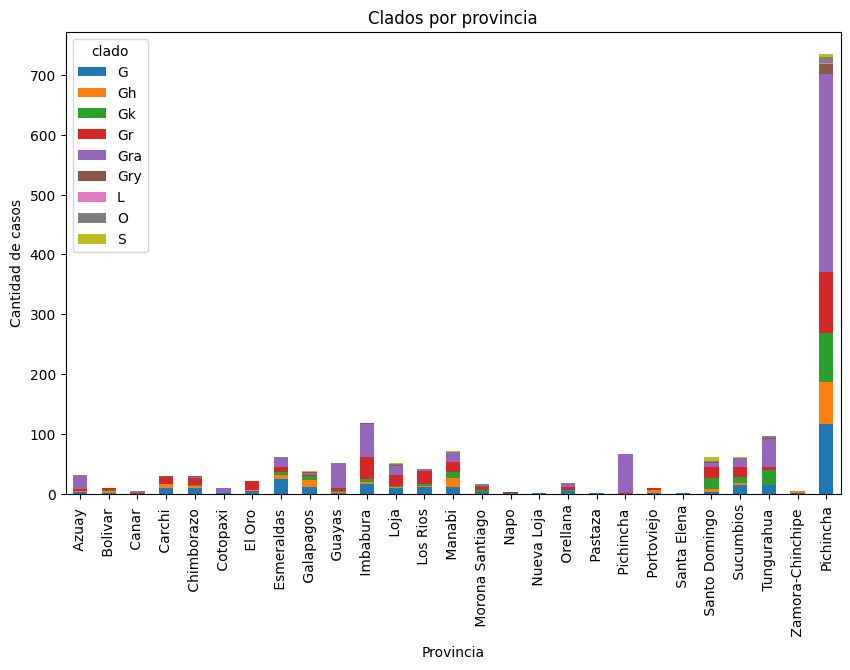

In [36]:
grouped=df.groupby('provincia')['clado'].value_counts().unstack()
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_title('Clados por provincia')
ax.set_xlabel('Provincia')
ax.set_ylabel('Cantidad de casos')

plt.show()

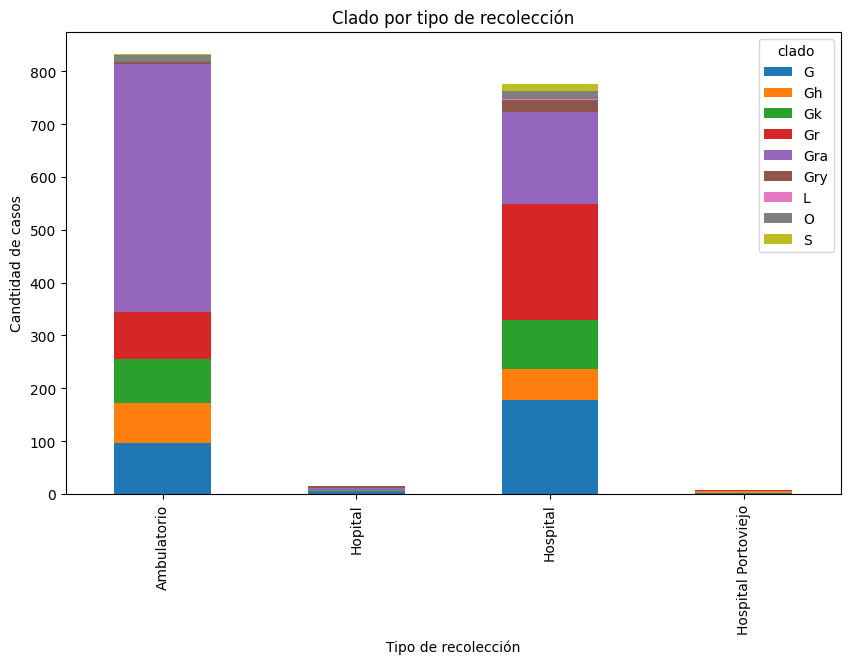

In [37]:
grouped=df.groupby('tipo')['clado'].value_counts().unstack()
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_title('Clado por tipo de recolección')
ax.set_xlabel('Tipo de recolección')
ax.set_ylabel('Candtidad de casos')

plt.show()

Text(0, 0.5, 'Genero')

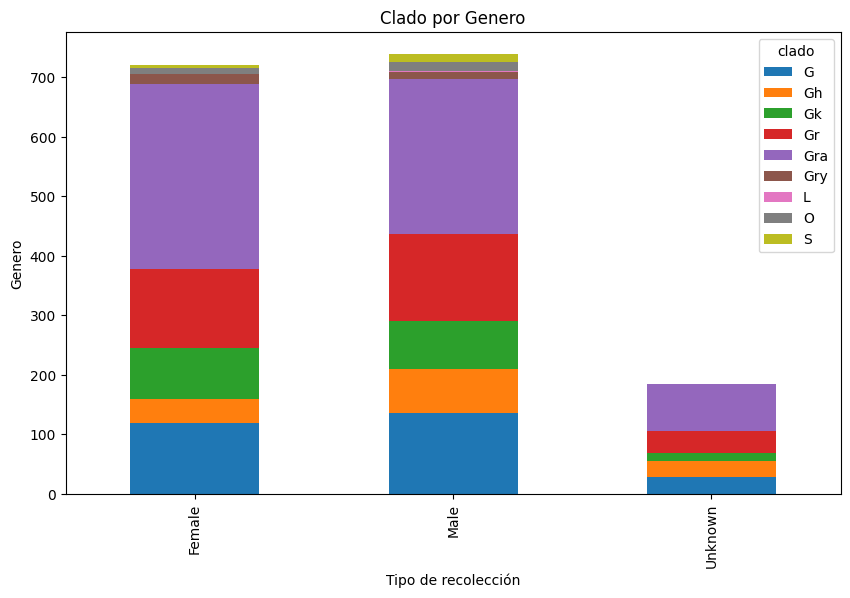

In [38]:
grouped=df.groupby('genero')['clado'].value_counts().unstack()
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_title('Clado por Genero')
ax.set_xlabel('Tipo de recolección')
ax.set_ylabel('Genero')

In [58]:
#Agrupar por mes y año 
print(df.index.dtype)
    
df['anio_mes']=df.index.to_series().dt.to_period('M')
df.head()


datetime64[ns]


,provincia,ciudad,tipo,genero,edad,linaje,clado,mutaciones,virus_name_unidentified,anio_mes
fecha_de_coleccion,,,,,,,,,,
2020-03-09,Pichincha,Quito,Hospital,Male,57,B.55,L,Spike E1207V,Hee-01,2020-03
2020-03-30,Pichincha,Quito,Hospital,Male,27,B.1.1,Gr,"(N_R203K,N_G204R,Nsp12_P323L,Nsp3_L431F,Spike_...",Hgsq-Usfq-018,2020-03
2020-03-30,Pichincha,Quito,Hospital,Male,40,B.1.14,O,"(Nsp15_S293T,Ns3_Q38P,Ns3_V163T,Ns3_R122E,Ns3_...",Hgsq-Usfq-007,2020-03
2020-03-30,Pichincha,Quito,Hospital,Male,39,B.1.14,O,"(Nsp15_S293T,Ns3_Q38P,Ns3_V163T,Ns3_R122E,Ns3_...",Hgsq-Usfq-010,2020-03
2020-04-17,Los Rios,Babahoyo,Hospital,Female,50,B.1.67,G,"(Nsp12_P323L,Spike_D614G)",Usfq-020,2020-04


Text(0, 0.5, 'Cantidad de muestras')

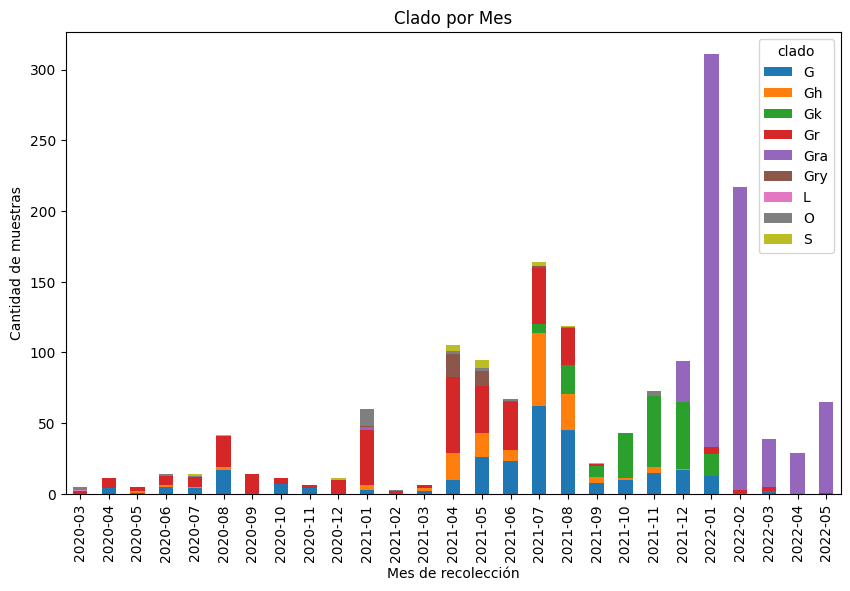

In [60]:
grouped=df.groupby('anio_mes')['clado'].value_counts().unstack()
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_title('Clado por Mes')
ax.set_xlabel('Mes de recolección')
ax.set_ylabel('Cantidad de muestras')

### Anomalies

#### Cleanup Round Brainstorm
- Drop Unnamed: 1 ; FECHA DE SUBIDA A GISAID ; GISAID ID
- Split `Virus name` and remove first two elements
- FECHA DE COLECCION apply pd.to_datetime()
- rewrite columns names to make them valid keywords (lowercase and underscore instead of whitespace) 
- decode text data and transform to lowercase
- Edad ; Genero must contain np.nan instead of unknown
- 

